<center><h1>Maharajwala_Raj_HW7</h1></center>

Name: Raj Vijay Maharajwala
<br>
Github Username: RajMaharajwala
<br>
USC ID: 4863-3649-66

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer, hamming_loss
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from joblib import Parallel, delayed
import operator
import time
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# pip install --upgrade tensorflow

### (a) Download the Anuran Calls (MFCCs) Data Set

In [3]:
df = pd.read_csv("../data/Frogs_MFCCs.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
X = df.iloc[:, :-4]
y = df.loc[:, 'Family':'Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
y_train.columns

Index(['Family', 'Genus', 'Species'], dtype='object')

### (b) Train a classifier for each label

#### (i) Research
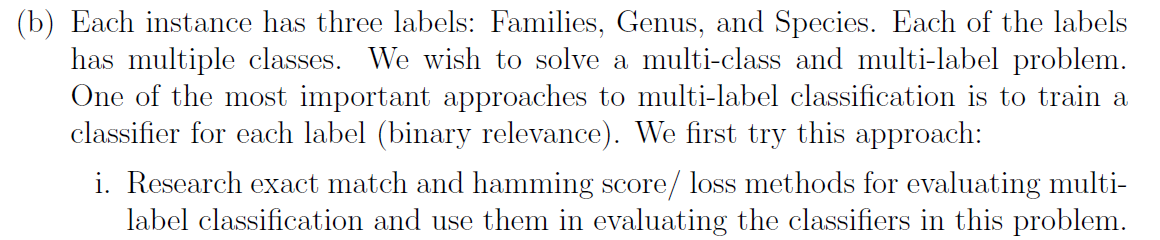

The "Exact match" metric measures the accuracy of a sample by requiring that every label in the sample matches the corresponding label in the dataset.

On the other hand, "Hamming Loss" is a label-based metric that counts the number of labels that are mismatched, rather than treating the labels of a sample as a single entity.

In [5]:
# Normalized data: For directly doing it StandardScaler can also be used
X_train = (X_train - X_train.mean())/X_train.std() 
X_test = (X_test - X_test.mean())/X_test.std()

In [29]:
# Train binary classifiers for each label: Logistic Regression
family_clf, genus_clf, species_clf = LogisticRegression(), LogisticRegression(), LogisticRegression()
family_clf.fit(X_train, y_train['Family'])
genus_clf.fit(X_train, y_train['Genus'])
species_clf.fit(X_train, y_train['Species'])

# Make predictions for the test set
family_preds = family_clf.predict(X_test)
genus_preds = genus_clf.predict(X_test)
species_preds = species_clf.predict(X_test)

print('# For Family:\n\tHamming Loss is {}'.format(round(hamming_loss(y_test['Family'], family_preds), 2)))
print('\tExact Match score is {}'.format(round(accuracy_score(y_test['Family'], family_preds), 2)))

print('\n# For Genus:\n\tHamming Loss is {}'.format(round(hamming_loss(y_test['Genus'], genus_preds), 2)))
print('\tExact Match score is {}'.format(round(accuracy_score(y_test['Genus'], genus_preds), 2)))

print('\n# For Species:\n\tHamming Loss is {}'.format(round(hamming_loss(y_test['Species'], species_preds), 2)))
print('\tExact Match score is {}'.format(round(accuracy_score(y_test['Species'], species_preds), 2)))

# For Family:
	Hamming Loss is 0.07
	Exact Match score is 0.93

# For Genus:
	Hamming Loss is 0.05
	Exact Match score is 0.95

# For Species:
	Hamming Loss is 0.03
	Exact Match score is 0.97


#### (ii) Train a SVM for each of the labels
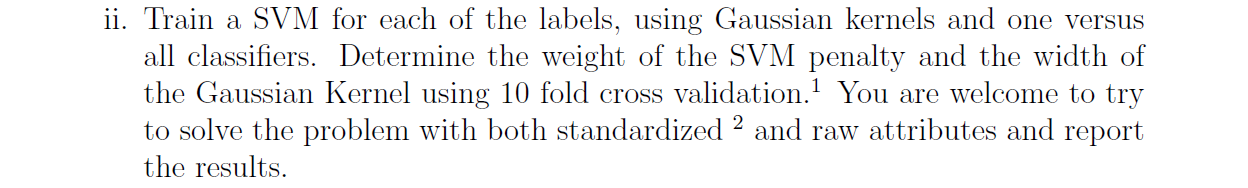
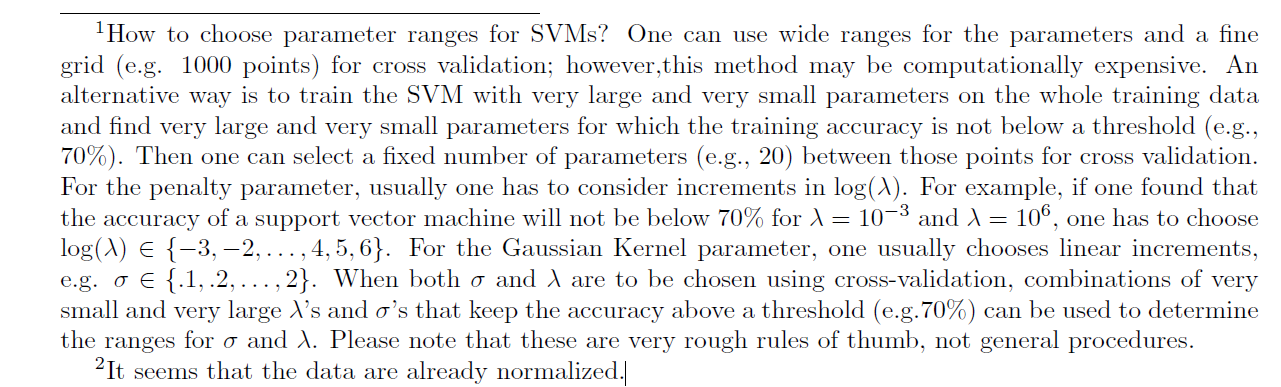

In [38]:
%time
# Define the parameter ranges
param_grid = {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-5, 2, 8)}
print(param_grid)
# Define the scorers
exact_match_scorer = make_scorer(accuracy_score)
hamming_scorer = make_scorer(hamming_loss)

# Train and evaluate the SVM for each label
for label in ['Family', 'Genus', 'Species']:
    svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring={'exact_match': exact_match_scorer, 'hamming_loss': hamming_scorer}, refit='exact_match')
    svm.fit(X_train, y_train[label])

    # Print the results
    print(f'\n For {label}:')
    print('Best parameters:', svm.best_params_)
    print('Exact match score:', svm.best_score_)
    print('Hamming loss:', svm.cv_results_['mean_test_hamming_loss'][svm.best_index_])
%time

Wall time: 2.02 ms
{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

 For Family:
Best parameters: {'C': 10.0, 'gamma': 0.1}
Exact match score: 0.9910647227744642
Hamming loss: 0.008935277225535675

 For Genus:
Best parameters: {'C': 10.0, 'gamma': 0.1}
Exact match score: 0.9876877623149989
Hamming loss: 0.012312237685001105

 For Species:
Best parameters: {'C': 1000.0, 'gamma': 0.01}
Exact match score: 0.9882837893275269
Hamming loss: 0.011716210672473098


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [42]:
%%time
try:
    # Define the parameter ranges
    param_grid = {'C': np.logspace(-3, 3, 7)}
    print(param_grid)
    # Train and evaluate the SVM for each label
    for label in ['Family', 'Genus', 'Species']:
        svm = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=param_grid, n_jobs=5, cv=10, scoring={'exact_match': exact_match_scorer, 'hamming_loss': hamming_scorer}, refit='exact_match')
        svm.fit(X_train, y_train[label])
        print(f'\n For {label}:')
        print('Best parameters:', svm.best_params_)
        print('Exact match score:', svm.best_score_)
        print('Hamming loss:', svm.cv_results_['mean_test_hamming_loss'][svm.best_index_])
except Exception as e:
    print(f'{type(e)}: {e}')

Wall time: 0 ns
{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

 For Family:
Best parameters: {'C': 1.0}
Exact match score: 0.9406288459717882
Hamming loss: 0.05937115402821168

 For Genus:
Best parameters: {'C': 10.0}
Exact match score: 0.9525438638013192
Hamming loss: 0.04745613619868093

 For Species:
Best parameters: {'C': 10.0}
Exact match score: 0.9602847202499291
Hamming loss: 0.03971527975007101
Wall time: 0 ns


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [46]:
param_grid = {'m__C': np.logspace(-3, 3, 7)}
print(param_grid)

exact_match_scorer = make_scorer(accuracy_score)
hamming_scorer = make_scorer(hamming_loss)

resampler = SMOTE()

# Train and evaluate the SVM for each label
for label in ['Family', 'Genus', 'Species']:
    svm = LinearSVC(penalty='l1', dual=False)
    pipeline = Pipeline(steps=[('r', resampler), ('m', svm)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=5, scoring={'exact_match': exact_match_scorer, 'hamming_loss': hamming_scorer}, refit='exact_match')
    grid_search.fit(X_train, y_train[label])
    print(f'\n For {label}:')
    print('Best parameters:', grid_search.best_params_)
    print('Exact match score:', grid_search.best_score_)
    print('Hamming loss:', grid_search.cv_results_['mean_test_hamming_loss'][grid_search.best_index_])

{'m__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

 For Family:
Best parameters: {'m__C': 10.0}
Exact match score: 0.9219638518097764
Hamming loss: 0.07803614819022373

 For Genus:
Best parameters: {'m__C': 1.0}
Exact match score: 0.9142210230679417
Hamming loss: 0.08577897693205842

 For Species:
Best parameters: {'m__C': 1.0}
Exact match score: 0.9569101265423333
Hamming loss: 0.0430898734576667


**Conclusion:**
After analyzing the three models with respect to their Average Exact Match Loss and Average Hamming Loss, it can be inferred that the Gaussian Kernel SVM is showing the most favorable performance.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [26]:
start_time = time.time()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
end_time = time.time()
print('Time taken for the code to run is {:.2f} seconds'.format(end_time - start_time))

Num GPUs Available:  1
Time taken for the code to run is 0.00 seconds


In [34]:
# Set GPU memory growth to true, so that TensorFlow doesn't use all the GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Set the default device to GPU
tf.config.set_visible_devices(gpus[0], 'GPU')

best_k_i = {}
for i in range(1, 51):
    silhouette_dict = {}
    for k in range(2, 51):
        model = KMeans(n_clusters=k)
        model = model.fit(X)
        index_k = model.labels_
        silhouetteScore = silhouette_score(X, index_k)
        silhouette_dict[k] = silhouetteScore

    silhouette_sort = sorted(silhouette_dict.items(), key=operator.itemgetter(1), reverse=True)
    best_k = silhouette_sort[0][0]
    best_k_i[i] = best_k
    
data = []
for i in range(1, 51):
    row = []
    row.append('i ' + str(i))
    row.append(best_k_i[i])
    data.append(row)

In [33]:
df = pd.DataFrame(data, columns=['iteration', 'Optimal k'])
df

,iteration,Optimal k
0,i 1,4
1,i 2,4
2,i 3,4
3,i 4,4
4,i 5,4
5,i 6,4
6,i 7,4
7,i 8,4
8,i 9,4
9,i 10,4


In [11]:
i_k_index = {}
for i in range(1, 51):
    model = KMeans(n_clusters=4)
    model = model.fit(X)
    clusterIndex = model.labels_
    i_k_index[i] = clusterIndex

# (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [17]:
start_time = time.time()
# Set GPU memory growth to true, so that TensorFlow doesn't use all the GPU memory
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

data = []
for itr in range(1, 51):
    bestCluster = 4
    clusterIndex = i_k_index[itr]
    clusterLabel = []
    for i in range(0, bestCluster):
        family, genus, species = {}, {}, {}
        for j in range(0, len(y)):
            if clusterIndex[j]==i:
                family[ y['Family'][j] ] = family.get(y['Family'][j], 0) + 1
                genus[ y['Genus'][j] ] = genus.get(y['Genus'][j], 0) + 1
                species[ y['Species'][j] ] = species.get(y['Species'][j], 0) + 1
        familyLabel, genusLabel, speciesLabel = max(family.items(), key=operator.itemgetter(1))[0], max(genus.items(), key=operator.itemgetter(1))[0], max(species.items(), key=operator.itemgetter(1))[0]
        clusterLabel.append({'Family': familyLabel, 'Genus': genusLabel, 'Species': speciesLabel})
    for i in range(0, bestCluster):
        data.append(['itr ' + str(itr), 'Cluster ' + str(i+1), clusterLabel[i]['Family'], clusterLabel[i]['Genus'], clusterLabel[i]['Species']])
    
df_label = pd.DataFrame(data, columns=['itr', 'Cluster', 'Family', 'Genus', 'Species'])
end_time = time.time()
print('Time taken for the code to run is {:.2f} seconds'.format(end_time - start_time))
df_label

Time taken for the code to run is 30.13 seconds


,itr,Cluster,Family,Genus,Species
0,itr 1,Cluster 1,Hylidae,Hypsiboas,HypsiboasCinerascens
1,itr 1,Cluster 2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,itr 1,Cluster 3,Hylidae,Hypsiboas,HypsiboasCordobae
3,itr 1,Cluster 4,Dendrobatidae,Ameerega,Ameeregatrivittata
4,itr 2,Cluster 1,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...,...,...
195,itr 49,Cluster 4,Hylidae,Hypsiboas,HypsiboasCinerascens
196,itr 50,Cluster 1,Hylidae,Hypsiboas,HypsiboasCinerascens
197,itr 50,Cluster 2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
198,itr 50,Cluster 3,Dendrobatidae,Ameerega,Ameeregatrivittata


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [23]:
import pandas as pd
avg_hamming_loss, avg_hamming_score, data = [], [], []
for itr in range(1, 51):
    cluster_index = i_k_index[itr]
    ypred_family, ypred_genus, ypred_species = [], [], []
    for i, cluster_name in enumerate(cluster_index):
        label = clusterLabel[cluster_name]
        ypred_family.append(label['Family'])
        ypred_genus.append(label['Genus'])
        ypred_species.append(label['Species'])
    actual_family_label = y['Family'].values
    actual_genus_label = y['Genus'].values
    actual_species_label = y['Species'].values
    ypred_family = np.array(ypred_family)
    ypred_genus = np.array(ypred_genus)
    ypred_species = np.array(ypred_species)
    family_hamming_loss = round(hamming_loss(ypred_family, actual_family_label), 3)
    family_hamming_score = round(accuracy_score(ypred_family, actual_family_label), 3)
    genus_hamming_loss = round(hamming_loss(ypred_genus, actual_genus_label), 3)
    genus_hamming_score = round(accuracy_score(ypred_genus, actual_genus_label), 3)
    species_hamming_loss = round(hamming_loss(ypred_species, actual_species_label), 3)
    species_hamming_score = round(accuracy_score(ypred_species, actual_species_label), 3)
    avg_hamming_loss_itr = round((family_hamming_loss + genus_hamming_loss + species_hamming_loss)/3, 3)
    avg_hamming_score_itr = round((family_hamming_score + genus_hamming_score + species_hamming_score)/3, 3)
    avg_hamming_loss.append(avg_hamming_loss_itr)
    avg_hamming_score.append(avg_hamming_score_itr)
    data.append(['itr ' + str(itr), avg_hamming_loss_itr, avg_hamming_score_itr])
df = pd.DataFrame(data, columns=['itr', 'Hamming Loss', 'Hamming Score'])
df

,itr,Hamming Loss,Hamming Score
0,itr 1,0.428,0.572
1,itr 2,0.308,0.692
2,itr 3,0.976,0.024
3,itr 4,0.445,0.555
4,itr 5,0.760,0.240
5,itr 6,0.222,0.778
6,itr 7,0.937,0.063
7,itr 8,0.760,0.240
8,itr 9,0.429,0.571
9,itr 10,0.355,0.645


## 3. ISLR 12.6.2

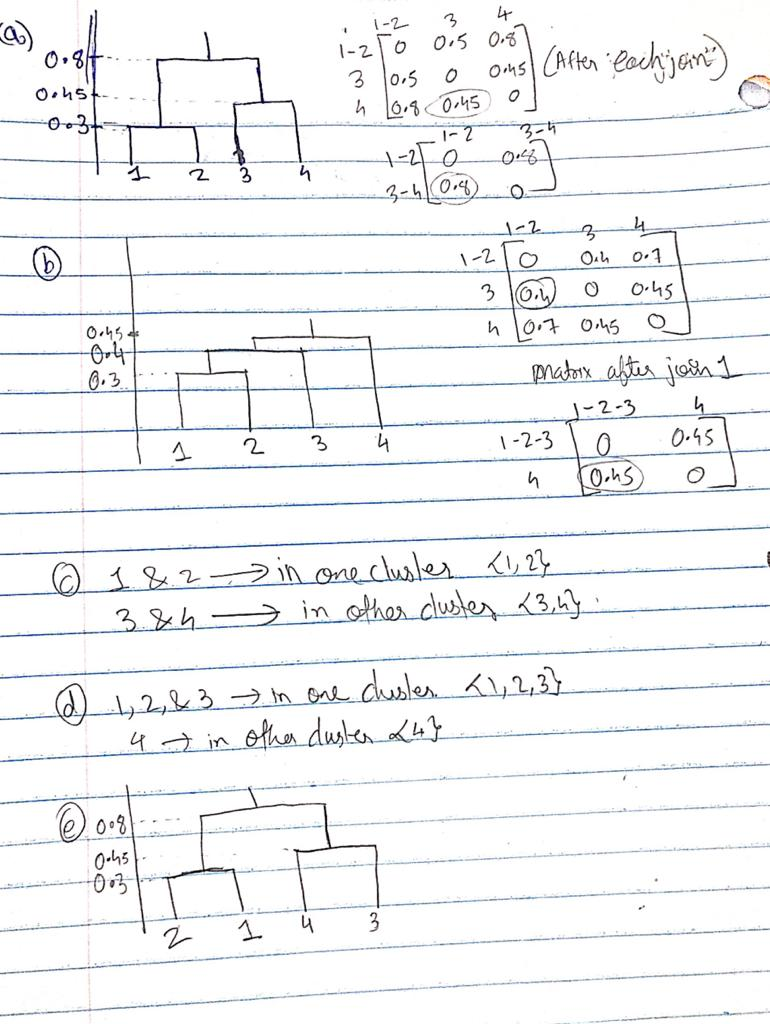